
# **Loading CIFAR-10**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.regularizers import l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


# **Model Building**

In [ ]:
# Define models
MLP_BN_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [ ]:
MLP_L2_model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, kernel_regularizer=l2(0.001), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [ ]:
Simple_CNN_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
CNN_DA_Dropout_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [ ]:
ResNet_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# **Model Training**

In [ ]:
# Compile all models
models = [MLP_BN_model, MLP_L2_model, Simple_CNN_model, CNN_DA_Dropout_model, ResNet_model]
model_names = ["MLP with BatchNorm", "MLP with L2", "Simple CNN", "CNN with DA and Dropout", "ResNet"]

i=0
for model in models:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(model_names[i]+" Model Architecture : \n")
    print(model.summary())
    i+=1

# Train all models and store results
results = []

for idx, (model, name) in enumerate(zip(models, model_names), start=1):
    print(f"Training Model {idx}: {name}...")
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test accuracy for {name}:', test_acc)
    results.append((history.history, test_loss, test_acc))


MLP with BatchNorm Model Architecture : 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
              

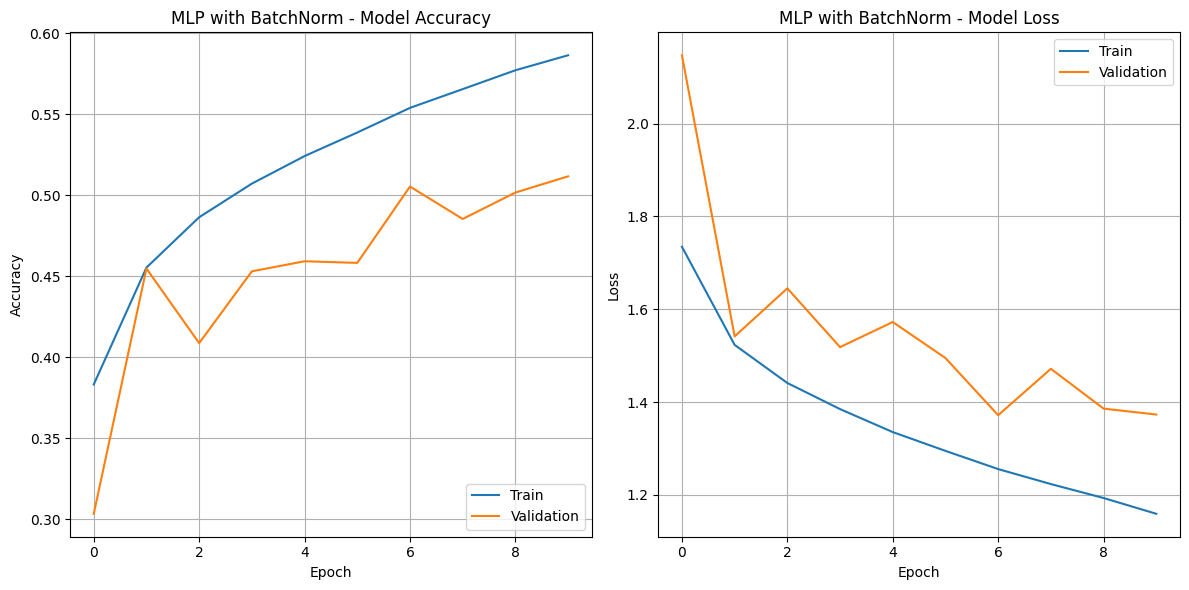

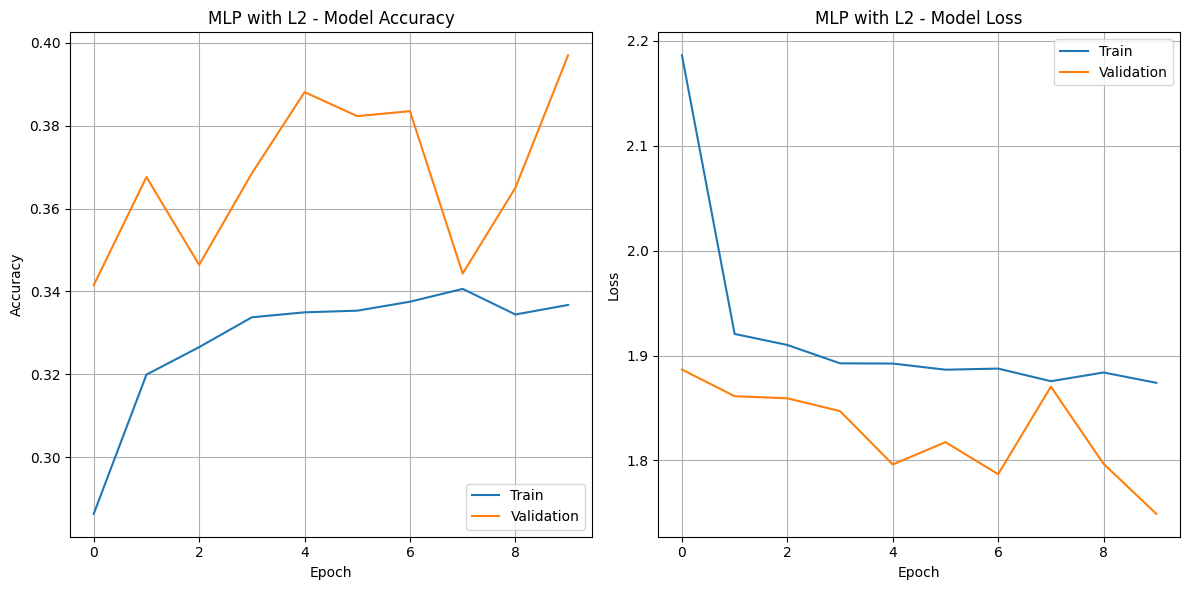

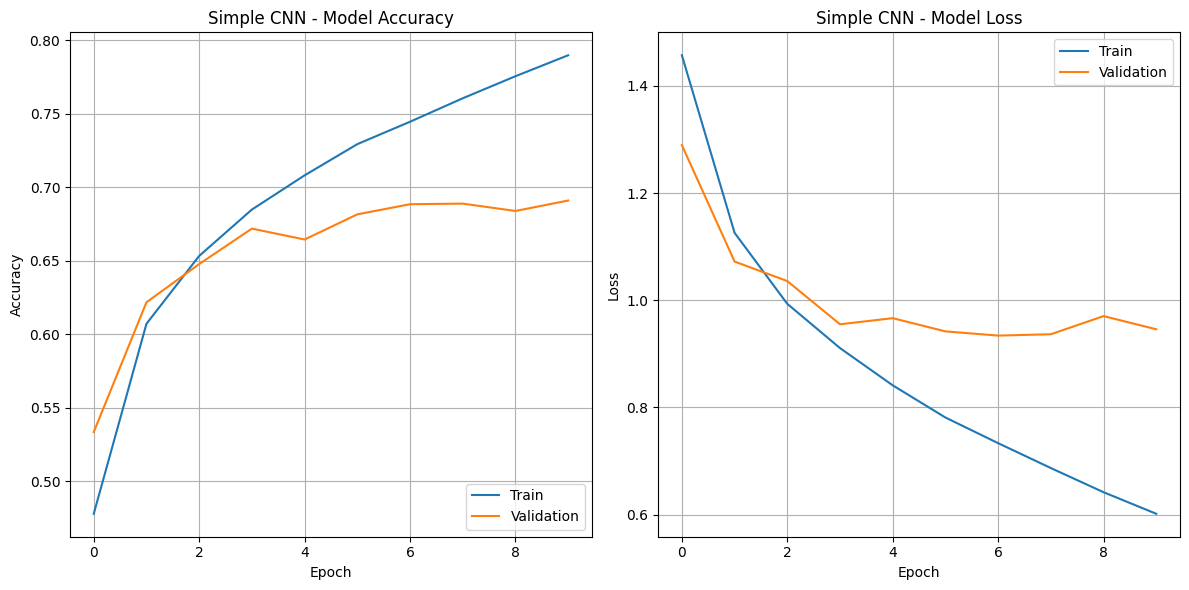

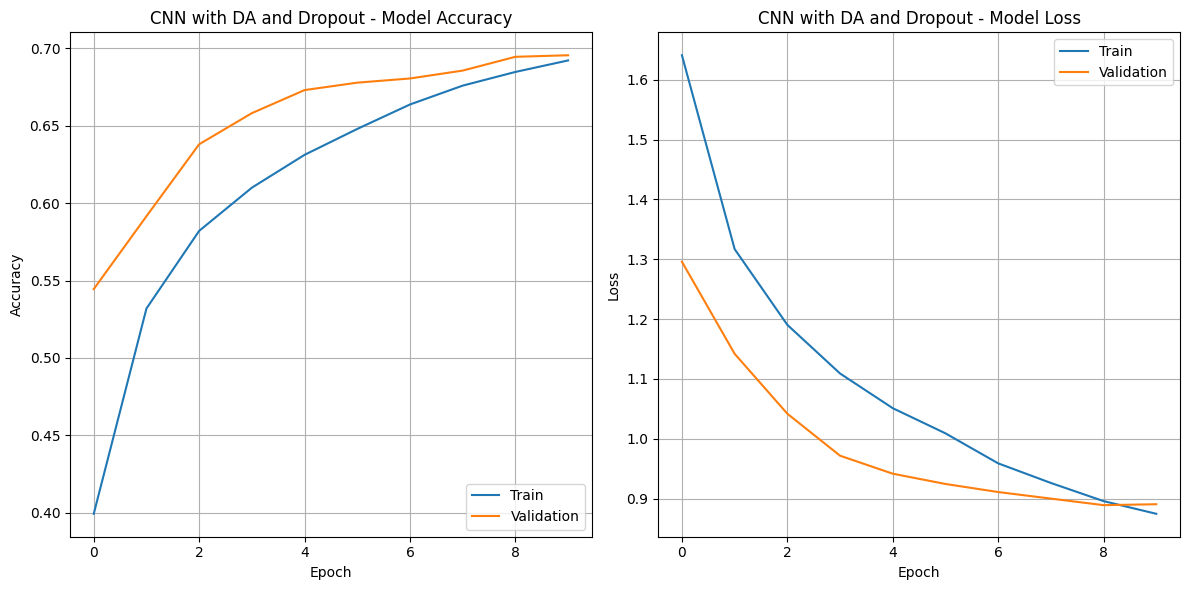

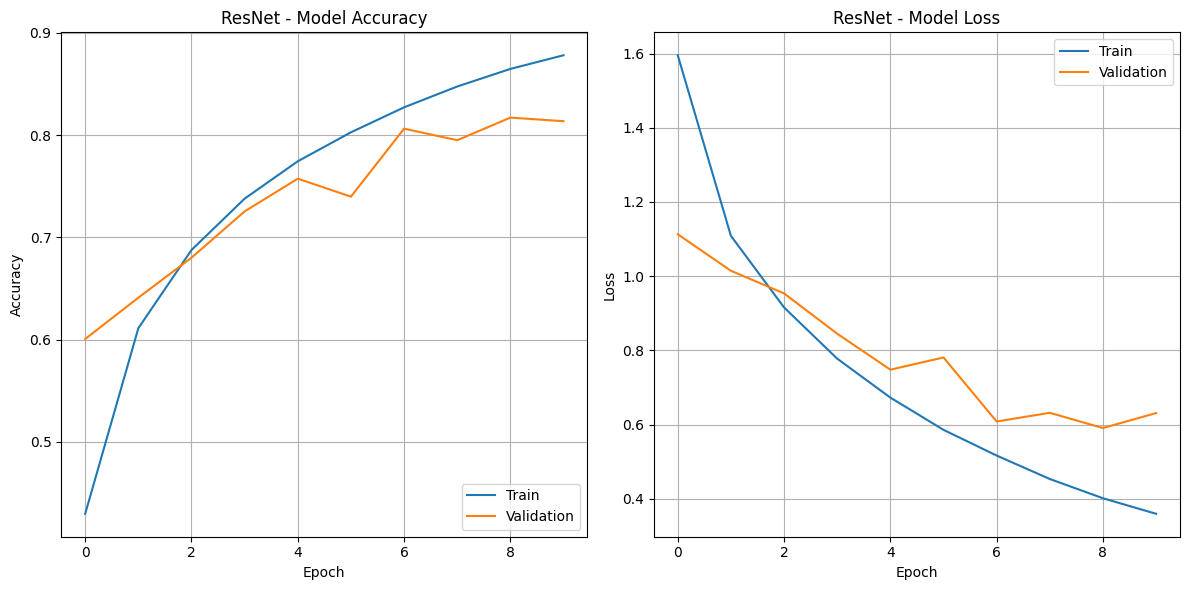

In [21]:
import matplotlib.pyplot as plt

# Function to plot learning curves
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title(title + ' - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(title + ' - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot learning curves for each model
for history, name in zip(results, model_names):
    plot_learning_curves(history[0], name)

# **Model Comparison**

In [ ]:
# Calculate metrics for each model
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, model in zip(model_names, models):
    pred = np.argmax(model.predict(test_images), axis=1)
    accuracy = accuracy_score(test_labels, pred)
    precision = precision_score(test_labels, pred, average='macro')
    recall = recall_score(test_labels, pred, average='macro')
    f1 = f1_score(test_labels, pred, average='macro')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Print the metrics DataFrame
print("Metrics for each model:")
display(metrics_df)

313/313 [==============================] - 1s 2ms/step
Metrics for each model:


,Model,Accuracy,Precision,Recall,F1 Score
0,MLP with BatchNorm,0.5116,0.536297,0.5116,0.511579
1,MLP with L2,0.3970,0.390330,0.3970,0.379442
2,Simple CNN,0.6909,0.692682,0.6909,0.687796
3,CNN with DA and Dropout,0.6956,0.695649,0.6956,0.692129
4,ResNet,0.8137,0.819477,0.8137,0.814185


<Figure size 1200x800 with 0 Axes>

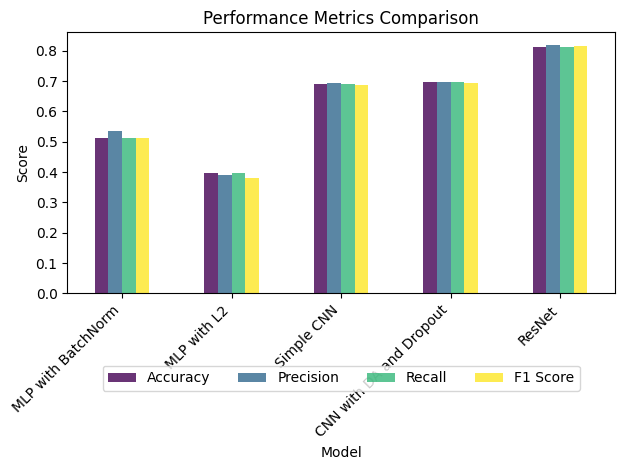

In [ ]:
import matplotlib.pyplot as plt

# Plotting the metrics
metrics_df.set_index('Model', inplace=True)

plt.figure(figsize=(12, 8))

metrics_df.plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=len(metrics_df.columns))

plt.tight_layout()
plt.show()
